In [32]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.cross_validation import train_test_split

In [33]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [34]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [36]:
variableName = rawData.iloc[:,0:4]
variableName.head()

,ID,LIMIT_BAL,SEX,EDUCATION
0,1,20000,2,2
1,2,120000,2,2
2,3,90000,2,2
3,4,50000,2,2
4,5,50000,1,2


In [37]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [38]:
#dependent variable
depVar = rawData['PAY_AMT6']

In [39]:
#Training Set (Feature Space: X Training)
x_train = (features[: 1000])
x_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [40]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [41]:
#Testing Set (x Testing)
x_test = features[-100:]
x_test_count = len(x_test.index)
print('The number of observations in the feature testing set is:',str(x_test_count))
x_test.head()

The number of observations in the feature testing set is: 100


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
29900,16809,0,0,0,0,0,0,0,0,0,0
29901,50845,48750,103486,50590,50248,49387,0,6556,3250,1563,1208
29902,10392,168088,168955,161351,126198,124746,168096,6409,7335,4448,4519
29903,27378,17082,13333,99,99,172104,10018,13333,99,99,172104
29904,54952,56021,54126,58732,59306,59728,2600,4553,5800,2000,1000


In [42]:
#Ground Truth (y_test)
y_test = features[:-100]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set is:',str(y_test_count))
y_test.head()

The number of observations in the Y training set is: 29900


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)
x_train.shape, x_test.shape

((750, 11), (250, 11))

In [44]:
model = LinearRegression(n_jobs=10)

In [45]:
#dependent variable
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
5          800
6        13770
7         1542
8         1000
9            0
10          66
11        3640
12           0
13           0
14        3000
15        1100
16           0
17       50000
18           0
19           0
20       33764
21           0
22        1820
23        1128
24        2000
25         997
26        1000
27        1012
28           0
29           0
         ...  
29970    16080
29971     3000
29972     4800
29973        0
29974     1000
29975     7022
29976        0
29977     5000
29978    10059
29979        0
29980     2000
29981      585
29982        0
29983     1701
29984     1000
29985        0
29986        0
29987     4005
29988     6009
29989        0
29990     2000
29991        0
29992        0
29993     2000
29994     4000
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [46]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [47]:
modelRF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
modelSVR.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
modelLR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print(cross_val_score(modelRF, x_train, y_train))

[0.28924384 0.01574197 0.08178995]


In [51]:
#Model Fitting
modelRF.fit(x_train,y_train)
print(cross_val_score(modelRF, x_train, y_train))
modelRF.score(x_train,y_train)

[0.25727129 0.02083984 0.08686585]


0.829792620983191

In [52]:
modelSVR.fit(x_train,y_train)
print(cross_val_score(modelSVR, x_train, y_train))
modelSVR.score(x_train,y_train)

[-0.022299   -0.01954184 -0.04080497]


-0.023556478787924995

In [53]:
modelLR.fit(x_train,y_train)
print(cross_val_score(modelLR, x_train, y_train))
modelLR.score(x_train,y_train)

[-0.79575337  0.39575306  0.44185999]


0.6318552473785469

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [55]:
predictions = modelRF.predict(x_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RSME: %.3f' % rmse)

R Squared: 0.061
RSME: 18287.203


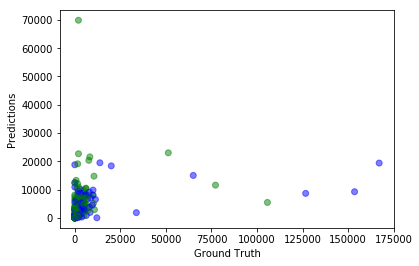

In [56]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

In [57]:
print(predictions)

[8.82100000e+02 5.61080000e+03 1.87280000e+03 5.46670000e+03
 8.04090000e+03 8.91770000e+03 3.15020000e+03 2.52220000e+03
 4.81340047e+01 2.80200000e+03 6.11340000e+03 0.00000000e+00
 1.94878000e+04 9.81290000e+03 8.22000000e+02 3.14900000e+02
 3.11890000e+03 5.98050000e+03 5.40770000e+03 2.00440000e+03
 1.29880000e+03 2.00000000e+01 2.88140000e+03 5.26690000e+03
 1.50157000e+04 3.05140000e+03 3.05920000e+03 5.12600000e+02
 2.94900000e+03 3.62510000e+03 6.48310000e+03 2.66420000e+03
 3.27800000e+03 4.81340047e+01 6.61500000e+03 5.16920000e+03
 5.70000000e+02 1.05240000e+04 5.00000000e+01 1.03500000e+02
 1.86501713e+01 8.14600000e+03 2.39700000e+02 2.03538000e+04
 2.65100000e+03 1.12820000e+03 1.86501713e+01 4.25200000e+02
 3.78490000e+03 4.96430000e+03 5.08387097e+00 0.00000000e+00
 0.00000000e+00 1.28000000e+02 7.20790000e+03 2.09250000e+03
 1.87901000e+04 3.64820000e+03 1.00180000e+03 4.04550000e+03
 8.98000000e+01 1.44470000e+03 3.75480000e+03 4.44940000e+03
 4.60400000e+02 1.666000